# Milestone 3 : Final project and the datastory 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL (CS-401). 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">

<blockquote>

## Project 📌

**Influence of the serving style on the tasting profile**:

Goal of the project: Use the textual reviews to find for each beer how it was served (either bottle, can or draft) and find how it influences the tasting profile.

Different serving styles may be adopted in different regions or for different types of beer.  The influence of the serving style could influence not only the appearance, but also the aroma, the palate or the taste.
</blockquote>

In [2]:
### Import libraries
from utils import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)

## Table of Contents 📚

1. [Datasets](#1-datasets)  
    1.1. [Loading the datasets](#1_1-loading-the-datasets)  
    1.2. [Initial Datasets Analysis](#1_2-initial-datasets-analysis)  
    1.3. [Merging the datasets](#1_3-merging-the-datasets)  

2. [Data Enrichment](#2-data-enrichment)  
    2.1. [Serving Style](#2_1-serving-style)  
    2.2. [Sentiment Analysis](#2_2-sentiment-analysis)  
    2.3. [Metrics Update](#2_3-metrics-update)  
    2.4. [Geographical Grouping](#2_4-geographical-grouping)  
    2.5. [Beer Style Grouping](#2_5-beer-style-grouping)

3. [Verifying the Dataset Representation](#3-verifying-the-dataset-representation)  

4. [Visualizations](#4-Visualizations)  
    4.1 [Temporal Analysis](#4_1-temporal-analysis)  
    4.2 [Geographical Analysis](#4_2-geographical-analysis)  
    4.3 [Beer Style Analysis](#4_3-beer-style-analysis)  
    
5. [Statistical Analysis](#5-statistical-analysis)  

## 1. Datasets 📂 <a id='1-datasets'></a>

> This part consists in loading the datasets, analyzing them and merging them.

### 1.1. Loading the datasets 📥 <a id='1_1-loading-the-datasets'></a> 

In [2]:
reviews = pd.read_csv(dataset_path + 'reviews.csv')
beers = pd.read_csv(dataset_path + 'beers.csv')
breweries = pd.read_csv(dataset_path + 'breweries.csv')
users = pd.read_csv(dataset_path + 'users.csv')

### 1.2 Initial Datasets Analysis 🔎 <a id='1_2-initial-datasets-analysis'></a>

#### 1.2.1 Beers dataset 🍺

In [3]:
display(beers.sample(3))
print('Shape of beers : ', beers.shape)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
268398,18915,Germinal Ambrée,9730,Brasserie des Sources,Flanders Red Ale,0,0,NaN,NaN,NaN,6.5,NaN,NaN,0,NaN
145927,237551,Desert Lavender Saison,32656,Arizona Wilderness Brewing Co.,Saison / Farmhouse Ale,3,1,3.93,NaN,NaN,6.0,3.896667,NaN,0,NaN
33546,267495,Bucolica,29466,Agribirrificio Luppolajo,Kölsch,1,0,3.87,NaN,NaN,4.4,3.870000,NaN,0,NaN


Shape of beers :  (280823, 15)


In [4]:
# print the number of beers id and beer name
print('Number of different beers id:', len(beers.beer_id.unique()))
print('Number of different beers name:', len(beers.beer_name.unique()))

Number of different beers id: 280823
Number of different beers name: 236209


<blockquote>

**Initial comments about the dataset**

-Some beers have the same name! In order to avoid confusion, we will drop the column beer_name (and brewery_name) from the dataset.

-As we will not use the RateBeer dataset, we can also drop the column nbr_matched_valid_ratings and avg_matched_valid_ratings.  

-The column bros_score only reflect the ratings from the two creators of the website, so we can also drop it.  

-ba_score represents the percentage (rounded to the tenth for depth) of raters who gave the beer a 3.75 or higher as long as the beers as at least 10 ratings.

</blockquote>

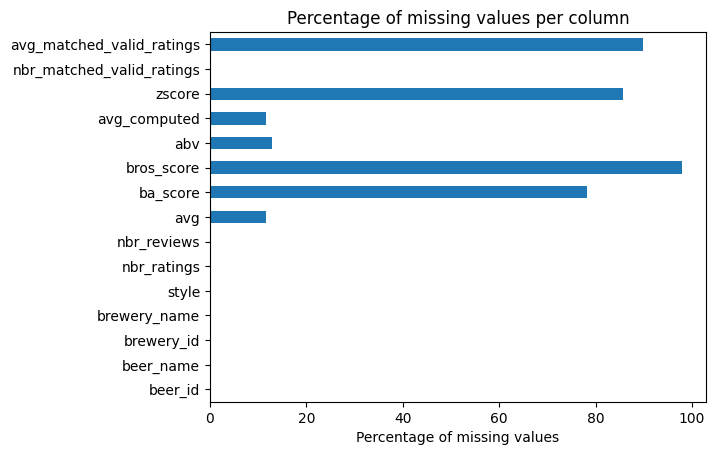

avg                      : 32829 missing values (11.69%)
ba_score                 : 219623 missing values (78.21%)
bros_score               : 275121 missing values (97.97%)
abv                      : 36024 missing values (12.83%)
avg_computed             : 32841 missing values (11.69%)
zscore                   : 240538 missing values (85.65%)
avg_matched_valid_ratings: 252551 missing values (89.93%)


In [5]:
show_missing(beers)

<blockquote>

**More comments about the dataset**

-We see that more than 80% of the beers do not have a z-score value. Since this value takes into account reviews from both websites and is vastly missing, we can drop the column alongside avg_computed. We might compute them manually later if needed.

-80% of the beers have no ba_score value, so we can also drop it and compute it later if needed.

-The other columns with NaN such as avg_matched_valid_ratings, avg_computed or bros_score are not useful in our analysis since we only look at the BeerAdvocate reviews.

-The column abv, which represents the alcohol percentage in a beer, is missing for approximately 12%.

</blockquote>

In [6]:
beers_filtered = beers.drop(columns=['beer_name', 
                            'brewery_name',
                            'bros_score',
                            'ba_score',
                            'nbr_matched_valid_ratings',
                            'avg_matched_valid_ratings',
                            'zscore',
                            'avg_computed']).copy(deep=True)

beers_filtered.rename(columns={'nbr_ratings': 'beer_nbr_ratings',
                               'nbr_reviews': 'beer_nbr_reviews'}, inplace=True)

In [7]:
beers_filtered.sample(3)

,beer_id,brewery_id,style,beer_nbr_ratings,beer_nbr_reviews,avg,abv
248578,93306,28520,English Brown Ale,15,2,3.96,5.5
280544,49943,11264,Extra Special / Strong Bitter (ESB),1,1,3.68,NaN
51021,111901,1252,American Malt Liquor,4,2,1.91,6.9


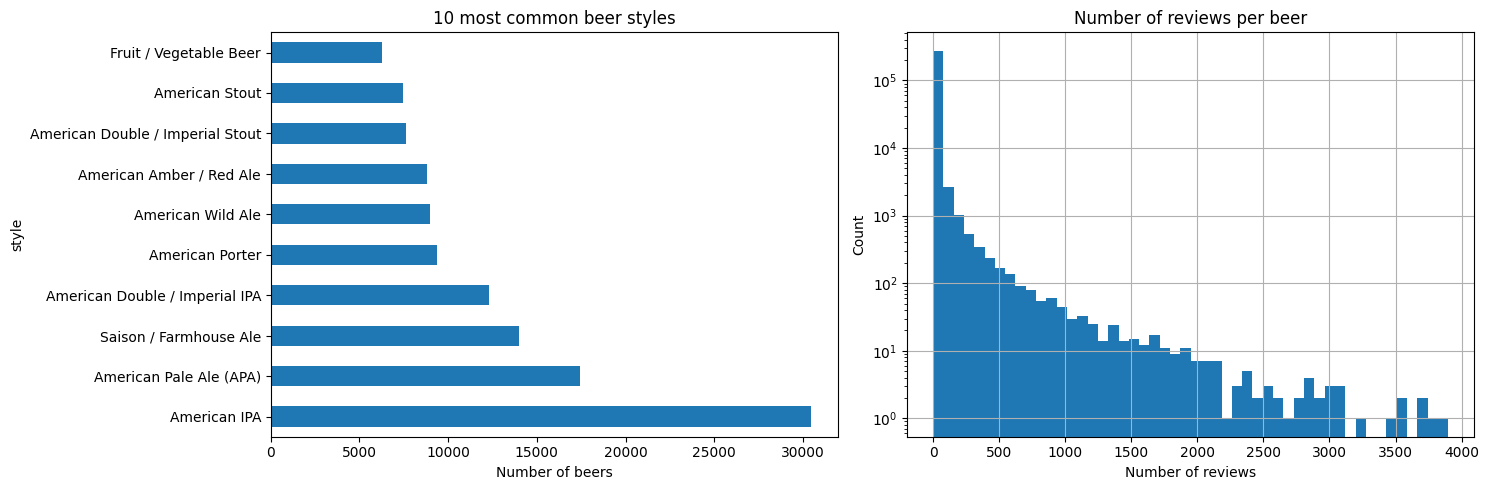

In [8]:
# Representation of the beers dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
beers_filtered['style'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common beer styles')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
beers_filtered['beer_nbr_reviews'].hist(bins=50,log=True)
plt.title('Number of reviews per beer')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.tight_layout()
plt.show()

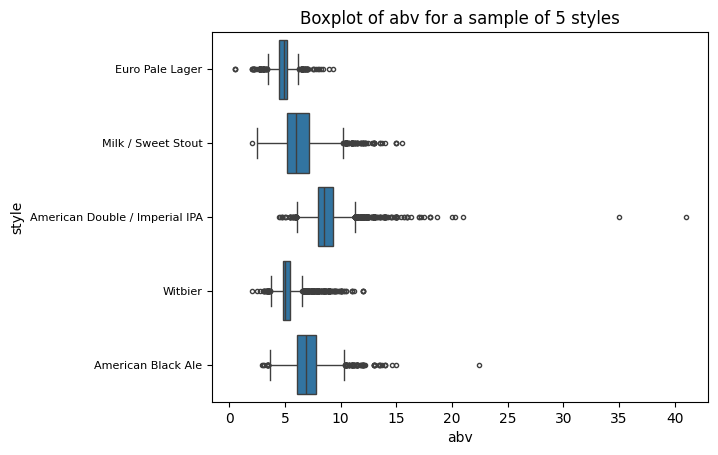

In [9]:
# boxplot of abv for sample of beers 
plt.figure()
sample_styles = beers_filtered['style'].sample(5)  # Select a sample of 5 beer styles
sns.boxplot(y='style', x='abv', data=beers_filtered[beers_filtered['style'].isin(sample_styles)], fliersize=3)
plt.yticks(fontsize=8)
plt.title('Boxplot of abv for a sample of 5 styles')
plt.show()

In [10]:
# group the beers by style and compute the median of abv for each style
median_abv_by_style = beers_filtered.groupby('style')['abv'].median()
# display(median_abv_by_style.sample(3))

# fill the missing abv values with the median of abv for the style of each beer
beers_filtered['abv'] = beers_filtered.apply(lambda x: median_abv_by_style[x['style']] if pd.isna(x['abv']) else x['abv'], axis=1)

In [11]:
beers_filtered.describe()

,beer_id,brewery_id,beer_nbr_ratings,beer_nbr_reviews,avg,abv
count,280823.000000,280823.000000,280823.000000,280823.000000,247994.000000,280823.000000
mean,148556.817141,21335.895860,29.887267,9.221417,3.721034,6.434481
std,84307.593397,15385.715656,231.010063,68.866445,0.476003,1.984850
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,76513.500000,3835.000000,1.000000,0.000000,3.500000,5.000000
50%,148867.000000,24075.000000,2.000000,1.000000,3.780000,6.000000
75%,221817.500000,33960.000000,8.000000,2.000000,4.010000,7.300000
max,293296.000000,49817.000000,16509.000000,3899.000000,5.000000,67.500000


<blockquote>

We are left with a dataset containing 280823 beers. We are only missing some values for avg as some beers do not have any ratings/reviews. They will be removed later when merging with the reviews dataset anyway.

</blockquote>

#### 1.2.2 Breweries dataset 🏭

In [12]:
display(breweries.sample(3))
print('Shape of breweries : ', breweries.shape)

,id,location,name,nbr_beers
10452,37563,"United States, Maryland",Red Shedman Farm Brewery & Hop Yard,23
6748,27124,Guadeloupe,Brasserie Du Corsaire,1
7,39917,Kyrgyzstan,Usu-Salkin Pivo,3


Shape of breweries :  (16758, 4)


In [13]:
# show the missing values
show_missing(breweries)

There are no missing values in this dataset.


<blockquote>

This dataset has no missing values, we will simply rename the columns and drop the brewery name.

</blockquote>

In [14]:
breweries_filtered = breweries.drop(columns=['name']).copy(deep=True)

breweries_filtered.rename(columns={'id':'brewery_id',
                                   'location':'brewery_location',
                                   'nbr_beers':'brewery_nbr_beers'}, inplace=True)

In [15]:
display(breweries_filtered.sample(3))
print('Shape of breweries filtered: ', breweries_filtered.shape)

,brewery_id,brewery_location,brewery_nbr_beers
14029,14699,"United States, Illinois",1196
2703,33595,Japan,1
6101,32555,Spain,12


Shape of breweries filtered:  (16758, 3)


In [16]:
# Some breweries have weird location values, they contain google maps links. All the breweries with a weird location value are in the US.
print('Number of breweries with a weird location value:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]))

# for loc in breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_location'].unique():
#     print(loc) # print the strange values

Number of breweries with a weird location value: 35


In [17]:
# manually adding the location for those 35 breweries

#obtain the brewery_id of the 35 breweries
strange_id = breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_id'].unique()

# create a dic with the brewery_id as key and unknwon as value
dic = {}
for i in strange_id:
    dic[i] = 'unknown'
    
# function that takes as input the brewery_id and a location and change the location of the brewery with the given id in the dictionary dic 
def change_location(brewery_id, us_state):
    location = 'United States, ' + us_state
    dic[brewery_id] = location

In [18]:
# take the first element of dic that has value unknown and print its location
for key, value in dic.items():
    if value == 'unknown':
        print('Brewery id:', key)
        print('Strange location:',breweries_filtered[breweries_filtered['brewery_id'] == key]['brewery_location'].values[0])        
        break

Brewery id: 2434
Strange location: United States</a> | <a href="http://maps.google.com/maps?oi=map&q=%2C+US" target="_blank">map</a><br><a href="http://bluecorncafe.com" target="_blank">bluecorncafe.com


In [19]:
#Changing the location in dic

change_location(brewery_id=2434,us_state='New Mexico')
change_location(brewery_id=2730,us_state='Wisconsin')
change_location(brewery_id=1551,us_state='California')
change_location(brewery_id=1552,us_state='Michigan')
change_location(brewery_id=2710,us_state='California')
change_location(brewery_id=3681,us_state='Ohio')
change_location(brewery_id=2413,us_state='California')
change_location(brewery_id=1793,us_state='Virginia')
change_location(brewery_id=6045,us_state='New Jersey')
change_location(brewery_id=2776,us_state='New York')
change_location(brewery_id=1751,us_state='Texas')
change_location(brewery_id=1554,us_state='Georgia')
change_location(brewery_id=1961,us_state='Maine')
change_location(brewery_id=4927,us_state='South Carolina')
change_location(brewery_id=23973,us_state='Maine')
change_location(brewery_id=2512,us_state='California')
change_location(brewery_id=6416,us_state='New Jersey')
change_location(brewery_id=2104,us_state='Oregon')
change_location(brewery_id=3079,us_state='Washington')
change_location(brewery_id=2410,us_state='Michigan')
change_location(brewery_id=1931,us_state='Ohio')
change_location(brewery_id=1553,us_state='Maine')
change_location(brewery_id=1550,us_state='Colorado')
change_location(brewery_id=32764,us_state='Illinois')
change_location(brewery_id=8451,us_state='Wyoming')
change_location(brewery_id=5114,us_state='California')
change_location(brewery_id=1802,us_state='North Carolina')
change_location(brewery_id=1819,us_state='Minnesota')
change_location(brewery_id=200,us_state='California')
change_location(brewery_id=918,us_state='Florida')
change_location(brewery_id=4343,us_state='California')
change_location(brewery_id=9765,us_state='New York')
change_location(brewery_id=1927,us_state='Colorado')
change_location(brewery_id=28908,us_state='Utah')
change_location(brewery_id=70,us_state='Oregon')
change_location(brewery_id=1567,us_state='Hawaii')

In [20]:
# change the location of the breweries in the breweries_filtered dataframe
for key, value in dic.items():
    breweries_filtered.loc[breweries_filtered['brewery_id'] == key, 'brewery_location'] = value

In [21]:
# how many different locations are there that contain United States
print('Number of different locations that contain United States:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('United States')]['brewery_location'].unique()))

Number of different locations that contain United States: 50


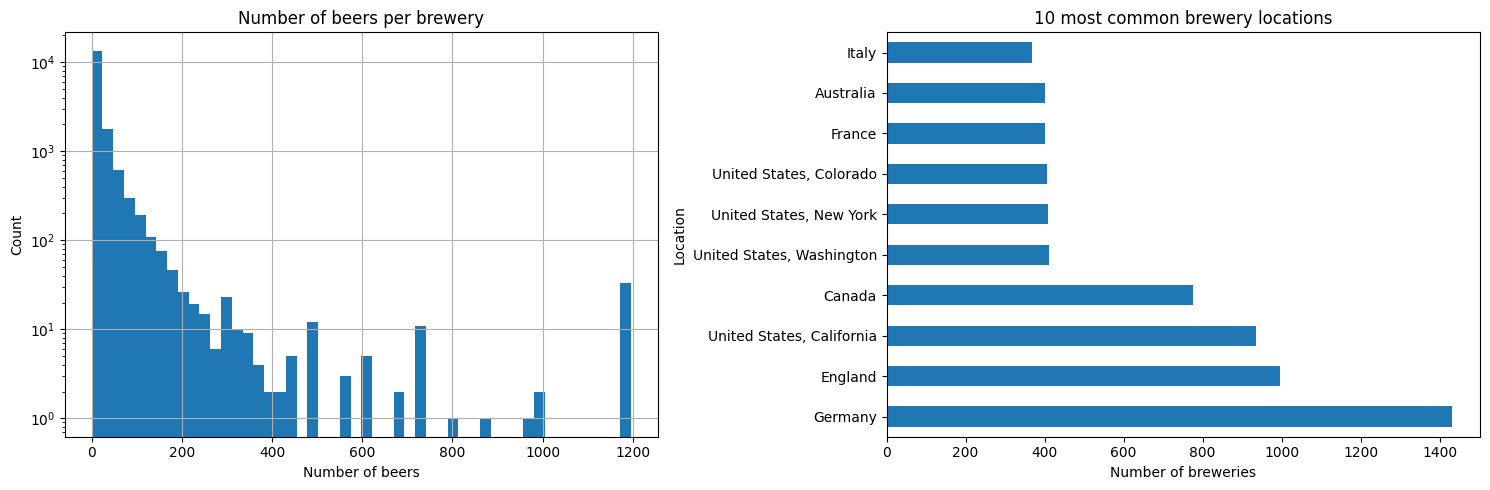

In [22]:
# Representation of beers per brewery and most common brewery locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
breweries_filtered['brewery_nbr_beers'].hist(bins=50, log=True)
plt.title('Number of beers per brewery')
plt.ylabel('Count')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
breweries_filtered['brewery_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common brewery locations')
plt.xlabel('Number of breweries')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

#### 1.2.3 Users dataset 👤

In [23]:
display(users.sample(3))
print('Shape of users : ', users.shape)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
136083,2,0,garybrooks.1192552,Garybrooks,1.488280e+09,"United States, Kansas"
3527,479,0,dapperticus.642482,Dapperticus,1.324033e+09,"United States, Kentucky"
109431,2,2,mrmcpickles.1124602,MrMcPickles,1.458904e+09,"United States, Minnesota"


Shape of users :  (153704, 6)


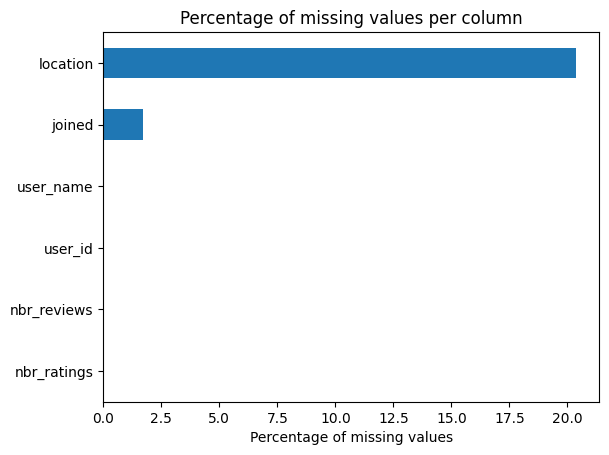

user_name                :     1 missing values (0.00%)
joined                   :  2652 missing values (1.73%)
location                 : 31279 missing values (20.35%)


In [24]:
show_missing(users)

<blockquote>

We are only missing information about when the user joined the website and locations. (and 1 username, which we drop anyway)

</blockquote>

In [25]:
users_filtered = users.drop(columns=['user_name']).copy(deep=True)

users_filtered.rename(columns={'nbr_ratings':'user_nbr_ratings',
                               'nbr_reviews':'user_nbr_reviews',
                               'joined':'user_joined',
                               'location':'user_location'}, inplace=True)

display(users_filtered.sample(3))
print('Shape of users filtered: ', users_filtered.shape)

,user_nbr_ratings,user_nbr_reviews,user_id,user_joined,user_location
73418,8,0,hblues21.989055,1.432116e+09,"United States, Illinois"
63373,19,11,inkman15.761138,1.382958e+09,"United States, New Jersey"
108443,1,1,mattialandoni.693372,1.347098e+09,NaN


Shape of users filtered:  (153704, 5)


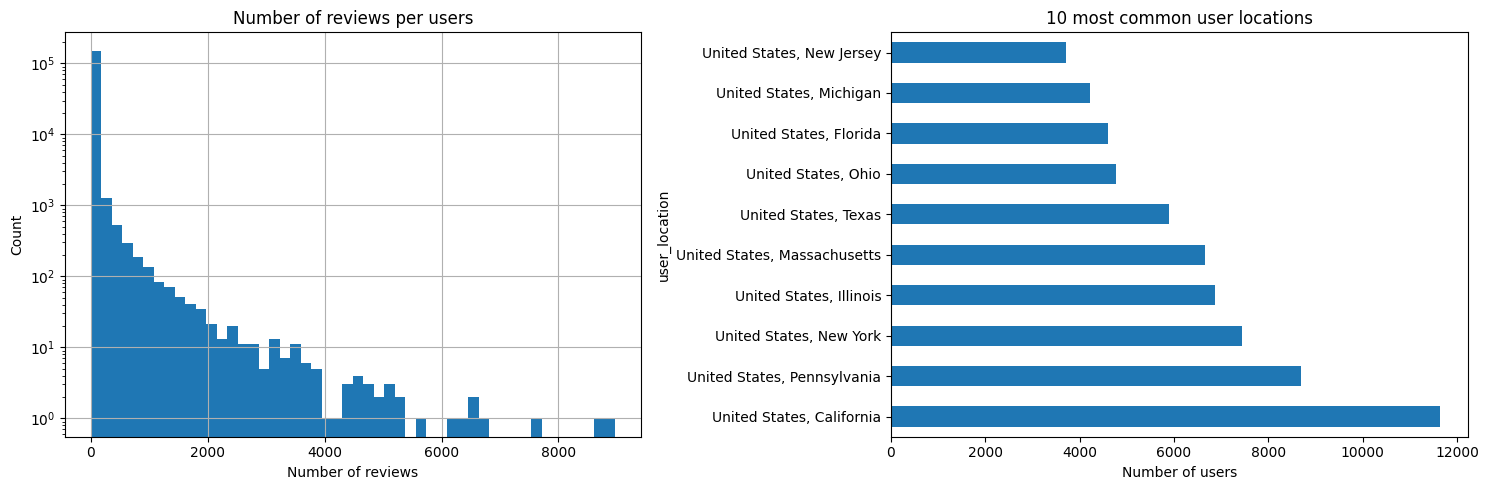

In [26]:
# Representation of reviews per user and most common user locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
users_filtered['user_nbr_reviews'].hist(bins=50, log=True)
plt.title('Number of reviews per users')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.subplot(1, 2, 2)
users_filtered['user_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common user locations')
plt.xlabel('Number of users')
plt.tight_layout()
plt.show()

<blockquote>

We observe that many users have no reviews at all, they will be removed from the dataset when merging. Also, the 10 most common user location are all in the US.

</blockquote>

#### 1.2.4 Reviews dataset 📝

In [27]:
display(reviews.sample(3))
print('Shape of reviews : ', reviews.shape)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
876493,Stone RuinTen Triple IPA,82250,Stone Brewing,147,American Double / Imperial IPA,10.8,1401530400,utfiero,utfiero.771132,4.25,4.25,4.0,4.25,4.25,4.23,Color- aspen leaf gold. Medium head....
413458,Murphy's Irish Stout,703,Murphy Brewery Ireland Limited,240,Irish Dry Stout,4.0,1079866800,smcolw,smcolw.4440,4.50,4.00,4.0,4.00,4.50,4.13,Classic cascading tan head; deep mah...
2065765,Founders KBS (Kentucky Breakfast Stout),19960,Founders Brewing Company,1199,American Double / Imperial Stout,11.8,1271412000,chaz01,chaz01.39362,4.00,3.50,4.5,4.00,3.50,3.83,12 ounce bottle served in a Founder'...


Shape of reviews :  (2589586, 16)


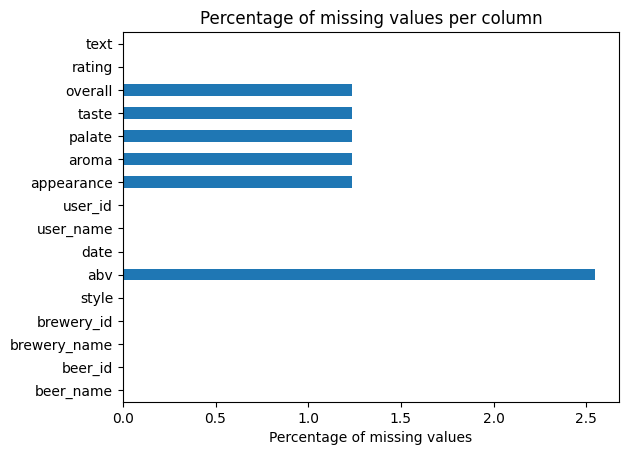

abv                      : 65983 missing values (2.55%)
user_name                :     3 missing values (0.00%)
appearance               : 32009 missing values (1.24%)
aroma                    : 32009 missing values (1.24%)
palate                   : 32009 missing values (1.24%)
taste                    : 32009 missing values (1.24%)
overall                  : 32009 missing values (1.24%)
text                     :     2 missing values (0.00%)


In [28]:
show_missing(reviews)

In [29]:
# making sure that all the missing values of the rating aspects are in the same rows

# print the number of rows that contains a NaN value for each column ['overall', 'taste', 'palate', 'aroma', 'appearance']
print('Number of rows with NaN values for each column :')
for col in ['overall', 'taste', 'palate', 'aroma', 'appearance']:
    print(col, ':', len(reviews[reviews[col].isna()]))
    
print()
# print the number of rows that contains a NaN value for all the rating aspects
missing_values = reviews[['overall', 'taste', 'palate', 'aroma', 'appearance']].isna()
missing_values['all_missing'] = missing_values.all(axis=1)
print(missing_values['all_missing'].value_counts())

Number of rows with NaN values for each column :
overall : 32009
taste : 32009
palate : 32009
aroma : 32009
appearance : 32009

all_missing
False    2557577
True       32009
Name: count, dtype: int64


<blockquote>

All the missing values are in the same rows, and they represent less than 1.5% of the dataset. We can drop them.

</blockquote>

In [30]:
# remove the columns that are not useful for our analysis
reviews_filtered = reviews.drop(columns=['user_name', 'beer_name', 'brewery_name']).copy(deep=True)

# remove the column abv because we have the information in the beers dataframe
reviews_filtered.drop(columns=['abv'], inplace=True)

#remove rows in reviews_filtered that have all_missing True in missing_values
reviews_filtered = reviews_filtered[~missing_values['all_missing']].copy(deep=True)

#remove the two reviews that have no text
reviews_filtered = reviews_filtered[~reviews_filtered['text'].isna()].copy(deep=True)

display(reviews_filtered.sample(3))
print('Shape of reviews_filtered : ', reviews_filtered.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text
1567766,1558,26,American Double / Imperial IPA,1294916400,thecpj.486367,4.0,4.0,4.00,4.50,4.50,4.30,Reviewed from notes 1/12/2011A: citr...
1238306,36042,2137,Scottish Ale,1237546800,trappistfan1.284447,4.5,4.0,4.50,5.00,4.50,4.58,A - Poured a deep amber color with a...
466411,72490,590,American Black Ale,1327748400,dabblinwisccraft.608092,4.0,4.5,4.25,4.25,4.25,4.30,This beer pours a cola brown-black w...


Shape of reviews_filtered :  (2557575, 12)


In [31]:
show_missing(reviews_filtered)

There are no missing values in this dataset.


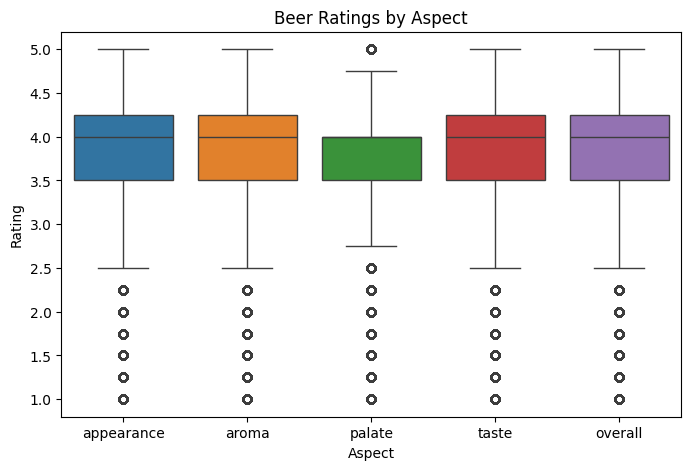

In [32]:
# boxplot for each rating column, appearance, aroma, palate, taste and overall

plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews_filtered[['appearance', 'aroma', 'palate', 'taste', 'overall']])
plt.title('Beer Ratings by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Rating')
plt.show()

### 1.3 Merging the datasets 🔗 <a id='1_3-merging-the-datasets'></a>

In [33]:
# Merge reviews with users and beers and breweries
df_merged = reviews_filtered.merge(beers_filtered, how='left', on=['beer_id', 'brewery_id', 'style'])
df_merged = df_merged.merge(users_filtered, how='left', on='user_id')
df_merged = df_merged.merge(breweries_filtered, how='left', on='brewery_id')

display(df_merged.sample(3))
print('Shape of df_merged : ', df_merged.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
615372,11426,1627,American Porter,1217844000,shiredave.659,4.00,3.5,3.50,4.0,4.50,3.93,Simple label design doesnt say much ...,264,169,3.57,5.8,255,253,1.030615e+09,"United States, New York","United States, California",38
1543724,4810,26,American Barleywine,1425207600,dmgeng.736736,4.75,5.0,4.75,5.0,4.75,4.91,I got this beer for the first time t...,1846,593,4.20,10.5,310,310,1.371031e+09,"United States, Indiana","United States, Indiana",333
287128,4847,3900,Hefeweizen,1348999200,eduardolinhalis.286149,4.00,4.0,3.50,4.0,4.50,4.05,500ml can served in a Weizen glass.A...,894,428,3.80,5.5,941,863,1.231585e+09,Switzerland,Germany,21


Shape of df_merged :  (2557575, 22)


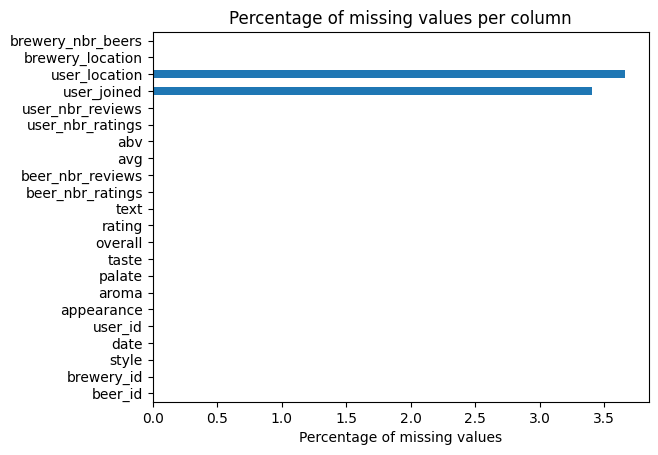

user_joined              : 87150 missing values (3.41%)
user_location            : 93668 missing values (3.66%)


In [34]:
show_missing(df_merged)

In [35]:
# We can replace missing user_joined values with the date of the first review of the user
df_merged['first_review'] = df_merged.groupby('user_id')['date'].transform('min')
df_merged['user_joined'] = df_merged['user_joined'].fillna(df_merged['first_review'])
df_merged.drop(columns=['first_review'], inplace=True)

> We have an almost complete dataset. Only information about the location of users is missing for 3.66% reviews.

In [36]:
# Save to parquet
# df_merged.to_parquet(dataset_path + 'BA_01_merged.parquet', index=False)

## 2. Data Enrichment 💸 <a id='2-data-enrichment'></a>

> Additional information is added to the dataset in order to be able to perform the analysis.

### 2.0 Original Metrics 📊 <a id='2_0-original-metrics'></a>

> These metrics are computed from the reviews dataset. They will be used later on to verify if the data filtering does not alter the dataset representation.

In [37]:
# load df from step 1
df = pd.read_parquet(dataset_path + 'BA_01_merged.parquet')

In [38]:
# for some fine analysis, we will compute the avg appearance, aroma, palate, taste and overall per beer
df['beer_id_avg_appearance'] = df.groupby('beer_id')['appearance'].transform('mean')
df['beer_id_avg_aroma'] = df.groupby('beer_id')['aroma'].transform('mean')
df['beer_id_avg_palate'] = df.groupby('beer_id')['palate'].transform('mean')
df['beer_id_avg_taste'] = df.groupby('beer_id')['taste'].transform('mean')
df['beer_id_avg_overall'] = df.groupby('beer_id')['overall'].transform('mean')
df['beer_id_avg_rating'] = df.groupby('beer_id')['rating'].transform('mean')

df['beer_id_std_appearance'] = df.groupby('beer_id')['appearance'].transform('std')
df['beer_id_std_aroma'] = df.groupby('beer_id')['aroma'].transform('std')
df['beer_id_std_palate'] = df.groupby('beer_id')['palate'].transform('std')
df['beer_id_std_taste'] = df.groupby('beer_id')['taste'].transform('std')
df['beer_id_std_overall'] = df.groupby('beer_id')['overall'].transform('std')
df['beer_id_std_rating'] = df.groupby('beer_id')['rating'].transform('std')

In [39]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating
1435177,26384,345,German Pilsener,1224237600,plaid75.13103,4.00,4.50,4.50,4.5,4.50,4.47,Poured a hazy medium straw hue with ...,104,80,4.11,6.1,3224,2520,1.105614e+09,"United States, New York","United States, Pennsylvania",317,4.093750,3.918750,4.087500,4.14375,4.275000,4.107375,0.457662,0.480267,0.44845,0.510607,0.544826,0.409018
1735103,51000,467,Kölsch,1253181600,mistofminn.259730,4.00,3.50,4.00,3.5,4.00,3.68,Color is clear straw yellow with a l...,57,47,4.06,4.7,563,563,1.224670e+09,"United States, Minnesota","United States, Minnesota",80,3.904255,3.851064,3.936170,4.12766,4.351064,4.073404,0.496053,0.560618,0.49582,0.526144,0.488063,0.448593
1296122,236271,20330,American IPA,1466330400,parmesan.999030,3.75,3.25,3.75,4.0,3.75,3.73,L: Copper gold color with a creamy w...,15,6,3.92,6.9,673,603,1.434103e+09,"United States, Colorado","United States, Colorado",23,4.083333,4.000000,3.541667,4.12500,3.958333,4.001667,0.516398,0.591608,0.79713,0.344601,0.367990,0.322950


Shape of df :  (2557575, 34)


### 2.1 Serving Style 🍾🥤🚰 <a id='2_1-serving-style'></a>

>Since our goal is to look at the influence of the serving style, we need to know how each beer was served.  

#### 2.1.1 Naive Approach

> A first idea was to use a naive approach. We only look at whether a word specific to as service style has been used. 

In [40]:
def serving_type_naive(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a new column serving_type_naive that contains the serving type of the beer using the naive approach.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_naive' column.
    """
    # Create 3 different columns according to the text review, "bottle", "can", "draft"
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans', }
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'keg'}
    
    # Create different columns if review text contains the word
    df['bottle'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in bottle))
    df['can'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in can))
    df['draft'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in draft))
    
    # Initialize the serving_type_naive column to 'not_set' with dtype str
    df['serving_type_naive'] = 'not_set'
    df['serving_type_naive'] = df['serving_type_naive'].astype(str)
    
    # if there are more than one true or no true, set the value to 'unknown'
    df.loc[df[['bottle', 'can', 'draft']].sum(axis=1) != 1, 'serving_type_naive'] = 'unknown'
    
    # if there is only one true, set the value to the corresponding serving type
    df.loc[df['bottle'] == True, 'serving_type_naive'] = 'bottle'
    df.loc[df['can'] == True, 'serving_type_naive'] = 'can'
    df.loc[df['draft'] == True, 'serving_type_naive'] = 'draft'

    # drop the columns bottle, can, and draft
    df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)
    
    return df

#### 2.1.2 Similarity Approach

> Compute the similarity between the reviews and a list of words specific to each serving style. The list is more exhaustive in this method, using words such as aluminium or cork for can and bottle respectively. The serving style with the highest similarity is then chosen.

In [41]:
def serving_type_sim(df: pd.DataFrame, word_bottle: str = 'data/bottle.txt', word_can: str = 'data/can.txt', word_draft: str = 'data/draft.txt', threshold: float = 0.05) -> pd.DataFrame:
    """
    Compute the cosine similarity between the review text and the list of words for each serving type. 
    Select the serving type with the highest similarity score.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - word_bottle (str): Path to the text file containing words related to 'bottle' serving type.
    - word_can (str): Path to the text file containing words related to 'can' serving type.
    - word_draft (str): Path to the text file containing words related to 'draft' serving type.
    - threshold (float): The threshold for considering a serving type based on cosine similarity.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_sim' column.
    """
    # Read the list of words from the text file
    with open(word_can, 'r') as file:
        word_can = file.read().splitlines()

    with open(word_bottle, 'r') as file:
        word_bottle = file.read().splitlines()

    with open(word_draft, 'r') as file:
        word_draft = file.read().splitlines()

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the review and words list using TF-IDF
    tfidf_matrix = vectorizer.fit_transform(df['text'].astype(str))

    can_vector = vectorizer.transform([" ".join(word_can)])
    can_vector
    bottle_vector = vectorizer.transform([" ".join(word_bottle)])
    draft_vector = vectorizer.transform([" ".join(word_draft)])

    # Calculate the cosine similarity
    cosine_sim_can = cosine_similarity(tfidf_matrix, can_vector)
    cosine_sim_bottle = cosine_similarity(tfidf_matrix, bottle_vector)
    cosine_sim_draft = cosine_similarity(tfidf_matrix, draft_vector)

    # Get the maximum similarity score and corresponding serving type
    max_sim = np.maximum.reduce([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft])
    serving_type = np.where(max_sim >= threshold, np.array(['bottle', 'can', 'draft'])[np.argmax([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft], axis=0)], 'unknown')

    # Add the serving_type_sim column to the dataframe
    df['serving_type_sim'] = serving_type

    return df

#### 2.1.3 Rule-based Approach

> Homemade algorithm used to find the serving type using a rule-based approach.

In [42]:
nlp = spacy.load("en_core_web_sm")

def differentiate_can(doc: Doc) -> List[str]:
    """
    Differentiate between the noun and verb form of the word "can" in the review text.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - List[str]: A list indicating whether each occurrence of "can" is used as a noun or a verb.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom

def remove_conditional(doc: Doc) -> Doc:
    """
    Remove parts of the review text that are in the conditional form.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - spacy.tokens.Doc: The modified SpaCy Doc object with conditional parts removed.
    """
    modified_tokens = []
    remove_sentence = False

    for sent in doc.sents:
        for token in sent:
            if remove_sentence:
                continue
            if token.text.lower() in {"would", "could", "'d", "will"}:
                subtree = [t.text for t in token.subtree]
                modified_tokens.extend(subtree[:-1])
                remove_sentence = True
            else:
                modified_tokens.append(token.text)

    modified_text = " ".join(modified_tokens)

    return nlp(modified_text)

def extract_serving_style(review: str) -> str:
    """
    Return the serving style of the beer using the rule-based approach.

    Parameters:
    - review (str): The input text of the beer review.

    Returns:
    - str: The serving style of the beer.
    """
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'on-tap', 'keg'}

    modified_doc = remove_conditional(nlp(review))
    #modified_doc = nlp(review)

    serving_styles = set()

    if any(word in modified_doc.text.lower() for word in bottle):
        serving_styles.add("bottle")
    if any(word in modified_doc.text.lower() for word in can) and "noun" in differentiate_can(modified_doc):
        serving_styles.add("can")
    if any(word in modified_doc.text.lower() for word in draft):
        serving_styles.add("draft")

    serving_style = serving_styles.pop() if len(serving_styles) == 1 else 'unknown'

    return serving_style

def process_row(row: pd.Series) -> str:
    """
    Process a row of a DataFrame, extracting the serving style of the beer from the 'text' column.

    Parameters:
    - row (pd.Series): A row of a DataFrame containing a 'text' column.

    Returns:
    - str: The serving style of the beer.
    """
    serving_style = extract_serving_style(row.text)
    return serving_style

def serving_type_rulebased(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply the rule-based serving type extraction function to each row of the DataFrame in parallel.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_rulebased' column.
    """
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

#### 2.1.4 Tense-based Approach

In [43]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

def differentiate_can_tense(doc: Doc) -> List[str]:
    """
    Differentiate between the noun and verb form of the word "can" in the review text.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - List[str]: A list indicating whether each occurrence of "can" is used as a noun or a verb.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom            

def detect_tense_before_containers(text):

    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'on-tap','growler', 'keg'}
    modified_doc = nlp(text)
    
    sentences = nltk.sent_tokenize(text)

    container = []
    poss =[]

    # Process each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        # Perform part-of-speech tagging
        pos_tags = pos_tag(words)
        # Create a spaCy doc for the sentence
        doc = nlp(" ".join(words))

        # Identify the tense based on the POS tags
        for i in range(len(pos_tags)):
            word, pos = pos_tags[i]

            if word.lower() in bottle:
                word = 'bottle'
                pos = 'NN'
            elif word.lower() in can and "noun" in differentiate_can_tense(modified_doc):
                pos = 'NN'
                #print(pos)
                word = 'can'
            elif word.lower() in draft:
                word = 'draft'

            # Check for beer container words
            if word.lower() in ['bottle', 'can', 'draft']:
    
                # A bool to check if there is a verb before the word
                #verb_bool = False

                # Check that the word is not a verb
                if pos not in ['VBD', 'VBN', 'VBG', 'VBZ', 'VBP', 'MD']:
                    verb_bool = False
                        # Find the tense of the verb just before the container word
                    for j in range(i - 1, -1, -1):
                        prev_word, prev_pos = pos_tags[j]
    
                            # Don't want the serving type if it is in the future
                        if prev_pos in ['MD']:
                            verb_bool = True
                                #print(prev_pos)
                            #break
    
                        if prev_pos in ['VBG', 'VBZ', 'VBP']:
                            poss.append(prev_pos)
                            container.append(word)
                            verb_bool = False
                            #break
                            
                            
                                
                        if prev_pos in ['VBD', 'VBN']:
                            poss.append(prev_pos)
                            container.append(word)
                            return container
                            #verb_bool = False
                            #print(prev_pos)
                               # break
                                
                                
                    # If there are no verbs before the word, it must be this serving style
                    if not verb_bool:
                        container.append(word)
                        return container                 
                    
def process_row_tb(row: pd.Series) -> str:
    """
    Process a row of a DataFrame, extracting the serving style of the beer from the 'text' column.

    Parameters:
    - row (pd.Series): A row of a DataFrame containing a 'text' column.

    Returns:
    - str: The serving style of the beer.
    """
    serving_style = extract_serving_style_tensebased(row.text)
    return serving_style

def extract_serving_style_tensebased(review: str) -> str:
    container = detect_tense_before_containers(review)
    if container is None or len(container) == 0 or len(set(container)) > 1:
        serving_style = 'unknown'
    else:
        container_str = str(container[0])
        serving_style = container_str
    return serving_style
    
def serving_type_tensebased(df):
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row_tb, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

#### 2.1.5 Evaluation on Manually Labeled Reviews

<blockquote>

To test which method performed best to retrieve the serving style of a beer, we manually labelled 250 reviews sampled randomly on the merged dataset. Each member of the group labelled 50 reviews as "unknown", "draft", "can" or "bottle".<break>


The goal was to learn more about the reviews, and find pattern that could help us for the rule-based method. After a few reviews, we added some words related to draft for example.


</blockquote>

In [44]:
#250 reviews for function evaluation (manually labelled)
# df_eval = df.sample(n=250, random_state=46).copy(deep=True)
# df_eval['true_serving_type'] = 'not_set'

# df_eval['true_serving_type'].value_counts()

# Function used to display a review and label the serving style
#idx = display_review(df_eval)
#df_eval = update_review_serving_type(df_eval, idx)

# df_eval.to_csv('data/BeerAdvocateEval.csv', index=False)

# Load the evaluation dataset
df_eval = pd.read_csv('data/BeerAdvocateEval.csv')

# Distribution of the serving types in the evaluation set
df_eval['true_serving_type'].value_counts()

true_serving_type
unknown    144
bottle      75
draft       24
can          7
Name: count, dtype: int64

In [45]:
# Evaluate the naive method

t1 = time.time()
df_eval = serving_type_naive(df_eval)
t_naive = time.time() - t1
print(f"Naive method took {t_naive:.4f} seconds")

print('Naive method accuracy:', compute_accuracy(df_eval['serving_type_naive'], df_eval['true_serving_type']))

Naive method took 0.0076 seconds
correct_count: 189, total_count: 250
Naive method accuracy: 0.756


In [46]:
# Evaluate the similarity method

t1 = time.time()
df_eval = serving_type_sim(df_eval, threshold=0.034)
t_sim = time.time() - t1
print(f"Similarity method took {t_sim:.4f} seconds")

print('Similarity method accuracy:', compute_accuracy(df_eval['serving_type_sim'], df_eval['true_serving_type']))

Similarity method took 0.0342 seconds
correct_count: 167, total_count: 250
Similarity method accuracy: 0.668


In [47]:
# Evaluate the rule-based method

t1 = time.time()
df_eval = serving_type_rulebased(df_eval)
t_rulebased = time.time() - t1
print(f"Rulebased method took {t_rulebased:.4f} seconds")

print('Rulebased method accuracy:', compute_accuracy(df_eval['serving_type_rulebased'], df_eval['true_serving_type']))

100%|██████████| 250/250 [00:05<00:00, 49.86it/s]

Rulebased method took 5.2598 seconds
correct_count: 236, total_count: 250
Rulebased method accuracy: 0.944


#### 2.1.6 Apply the Best Method to the Dataset

> After classifying the whole dataset using the rule-based method, we used the tense-based method to classify the reviews that were not classified by the rule-based method. The reviews that were still not classified were removed from the dataset.

In [66]:
df = pd.read_parquet(dataset_path + 'BA_02_serving_type.parquet')

In [67]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased
307745,116007,24940,American Wild Ale,1397901600,stonedtrippin.601042,3.5,3.75,3.75,3.75,3.75,3.74,i like this one less than the other ...,725,75,4.16,7.0,8970,8970,1.306577e+09,"United States, Colorado","United States, California",128,3.982639,4.173611,4.097222,4.204861,4.184028,4.171250,0.389850,0.321306,0.374249,0.344285,0.308315,0.283340,bottle
522785,76440,3818,Milk / Sweet Stout,1382263200,burnerfinger.361035,4.5,4.50,4.50,2.75,2.00,3.30,poured from the 12 oz bottle into my...,2244,430,3.79,7.5,221,221,1.250503e+09,"United States, Texas","United States, New York",145,3.855107,3.693587,3.830166,3.818884,3.794537,3.788361,0.502462,0.469226,0.502629,0.501788,0.458329,0.402147,bottle
32735,12950,6577,English Stout,1274090400,freshhawk.396593,4.5,4.00,3.50,4.50,4.50,4.28,A - Dark root beer color with chestn...,38,19,3.90,4.5,1364,778,1.259060e+09,"United States, Illinois",England,44,4.184211,3.618421,3.631579,3.907895,3.736842,3.794211,0.415349,0.542425,0.689043,0.854768,0.843577,0.651556,bottle


Shape of df :  (1137574, 35)


In [68]:
for serving_type, count in df['serving_type_rulebased'].value_counts().items():
    percentage = count / len(df) * 100
    print(f"{serving_type}: {percentage:.2f}%")

bottle: 70.89%
draft: 23.42%
can: 5.69%


### 2.2 Sentiment Analysis 🤔 <a id='2_2-sentiment-analysis'></a>

> An additional column was added to the reviews dataset, containing the sentiment of the review. The sentiment was computed using the TextBlob library. The sentiment is a float between -1 and 1, where -1 is a negative sentiment and 1 is a positive sentiment. The sentiment is computed using the polarity of the review. It will be used as an additional element of comparison between the different serving styles.

In [69]:
# df = sentiment_analysis(df)
# df.to_parquet(dataset_path + 'BA_03_sentiment_analysis.parquet', index=False)

df = pd.read_parquet(dataset_path + 'BA_03_sentiment_analysis.parquet')

100%|██████████| 1137574/1137574 [08:05<00:00, 2342.24it/s]


In [70]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity
741270,59151,64,American Double / Imperial Stout,1321095600,shanepb.500016,4.0,3.5,3.0,4.0,4.0,3.78,750 ml bottle from the late 2011 bat...,3741,930,4.13,9.0,3433,600,1.283767e+09,"United States, Pennsylvania","United States, Delaware",378,4.270630,4.037731,4.078176,4.140065,4.125136,4.114636,0.417983,0.433798,0.503786,0.484186,0.474503,0.371569,bottle,0.076732
646126,46504,450,English Dark Mild Ale,1316253600,rifugium.304205,3.5,3.5,3.5,3.5,3.5,3.50,First had: ?Not sure where or when I...,1121,308,3.69,4.2,4993,3297,1.235992e+09,"United States, Pennsylvania","United States, Pennsylvania",120,3.744281,3.515523,3.662582,3.691993,3.856209,3.683301,0.488566,0.540154,0.571449,0.543691,0.605096,0.460187,draft,0.210417
773685,77617,15189,American Stout,1327143600,cwguy5.505905,4.0,5.0,4.5,5.0,4.5,4.79,On-tap at a Big Boss event at Duckwo...,3,2,4.38,6.2,316,127,1.285150e+09,"United States, North Carolina","United States, North Carolina",78,3.750000,4.500000,4.250000,4.750000,4.250000,4.480000,0.353553,0.707107,0.353553,0.353553,0.353553,0.438406,draft,0.156207


Shape of df :  (1137574, 36)


### 2.3 Metrics Update 🔁 <a id='2_3-metrics-update'></a>

> The metrics updated in this step will be compared with the ones computed before the filtering. Since our dataset has been reduced by approximately half, we will check if our final dataset is still representative of the initial one. 

In [71]:
# compute the number of valid reviews per user
df['user_filtered_nbr_reviews'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_id_filtered_nbr_reviews'] = df.groupby('beer_id')['beer_id'].transform('count')

In [72]:
# for some fine analysis, we will compute the avg appearance, aroma, palate, taste and overall per beer
df['beer_id_filtered_avg_appearance'] = df.groupby('beer_id')['appearance'].transform('mean')
df['beer_id_filtered_avg_aroma'] = df.groupby('beer_id')['aroma'].transform('mean')
df['beer_id_filtered_avg_palate'] = df.groupby('beer_id')['palate'].transform('mean')
df['beer_id_filtered_avg_taste'] = df.groupby('beer_id')['taste'].transform('mean')
df['beer_id_filtered_avg_overall'] = df.groupby('beer_id')['overall'].transform('mean')
df['beer_id_filtered_avg_rating'] = df.groupby('beer_id')['rating'].transform('mean')

df['beer_id_filtered_std_appearance']= df.groupby('beer_id')['appearance'].transform('std')
df['beer_id_filtered_std_aroma']= df.groupby('beer_id')['aroma'].transform('std')
df['beer_id_filtered_std_palate']= df.groupby('beer_id')['palate'].transform('std')
df['beer_id_filtered_std_taste']= df.groupby('beer_id')['taste'].transform('std')
df['beer_id_filtered_std_overall']= df.groupby('beer_id')['overall'].transform('std')
df['beer_id_filtered_std_rating']= df.groupby('beer_id')['rating'].transform('std')

In [73]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating
476289,141,42,Saison / Farmhouse Ale,1310724000,davidst.604766,4.0,4.5,4.0,4.5,4.5,4.42,Poured from a 750ml bottle into a tu...,6004,2176,4.17,7.7,757,529,1.308218e+09,"United States, Texas","United States, New York",104,4.226884,4.082755,4.127601,4.211396,4.234281,4.177984,0.429981,0.469619,0.473039,0.490969,0.487810,0.385883,bottle,0.253656,514,990,4.231818,4.087879,4.143687,4.225000,4.244192,4.188485,0.436484,0.475092,0.469627,0.498424,0.507431,0.394555
482504,680,45,Russian Imperial Stout,1164452400,muenchenerkindl.76824,4.5,4.5,5.0,5.0,4.5,4.75,Poured from a 12 oz bottle about 100...,6676,2810,4.15,10.0,900,900,1.146391e+09,Germany,"United States, New York",181,4.280079,4.101571,4.158693,4.206266,4.057301,4.151342,0.439167,0.457567,0.483416,0.497186,0.524508,0.384129,bottle,0.192529,832,1174,4.259157,4.091141,4.157794,4.188884,4.063884,4.141857,0.423333,0.452211,0.487334,0.486871,0.521457,0.371273
988941,75930,24018,Saison / Farmhouse Ale,1348567200,huskyinpdx.557154,4.0,3.0,2.5,3.0,3.0,3.01,Bottle opened on 9.19.12.A - Pours a...,678,119,3.83,2.9,2408,1762,1.295780e+09,"United States, Washington","United States, Texas",125,3.938559,3.838983,3.845339,3.830508,3.927966,3.861271,0.503127,0.489773,0.584632,0.510448,0.506477,0.447950,bottle,0.138111,1601,51,3.995098,3.813725,3.872549,3.803922,3.941176,3.853137,0.488595,0.420842,0.537058,0.472530,0.465264,0.395578


Shape of df :  (1137574, 50)


### 2.4 Geographical Grouping 🌎 <a id='2_4-geographical-grouping'></a>

> Additional information about the location of the users was added to the dataset. Each country was assigned to a sub-region. Additionally, US users were assigned to a state. This information will be used to compare the serving style in different regions and states.

In [74]:
# Load dataset with countries information
countries = pd.read_csv('data/countries_region.csv')[['name', 'sub-region']]
display(countries.sample(3))
print('Shape of countries : ', countries.shape)

,name,sub-region
125,Lesotho,Sub-Saharan Africa
216,Syrian Arab Republic,Western Asia
86,Greece,Southern Europe


Shape of countries :  (249, 2)


In [75]:
# add a column user_country with the country of the user
df['user_location'] = df['user_location'].fillna('Unknown')
df['user_country'] = df['user_location'].apply(lambda x: 'United States of America' if 'United States, ' in x else x)

df[['user_location', 'user_country']].sample(3)

,user_location,user_country
199035,"United States, New Jersey",United States of America
974032,"United States, Washington",United States of America
889032,"United States, Minnesota",United States of America


In [76]:
# rename or add country in countries df where the name is different than in user_country

# rename the column of countries that cause problems 
def rename_countries(old_name, new_name):
    countries['name'] = countries['name'].replace(old_name, new_name)
    return

rename_countries('Bolivia (Plurinational State of)', 'Bolivia')
rename_countries('Tanzania, United Republic of', 'Tanzania')
rename_countries('South Georgia and the South Sandwich Islands', 'South Georgia and South Sandwich Islands')
rename_countries('Fiji', 'Fiji Islands')
rename_countries('New Zealand', 'Aotearoa')
rename_countries('Taiwan, Province of China', 'Taiwan')
rename_countries('North Macedonia', 'Macedonia')
rename_countries('Viet Nam', 'Vietnam')
rename_countries('Russian Federation', 'Russia')
rename_countries('Czechia', 'Czech Republic')
rename_countries('Slovakia', 'Slovak Republic')
rename_countries('Svalbard and Jan Mayen', 'Svalbard and Jan Mayen Islands')

new_countries = pd.DataFrame({'name': ['England', 'Wales', 'Northern Ireland', 'Scotland', 'Unknown'], 'sub-region': ['Northern Europe','Northern Europe','Northern Europe','Northern Europe', 'Unknown']})

countries = pd.concat([countries, new_countries]).drop_duplicates().reset_index(drop=True)

In [77]:
# add column user_subregion to df
df = df.merge(countries[['name', 'sub-region']], left_on='user_country', right_on='name', how='left')
df.rename(columns={'sub-region': 'user_subregion'}, inplace=True)
df = df.drop(columns=['name'])

display(df[['user_location', 'user_country', 'user_subregion']].sample(3))

,user_location,user_country,user_subregion
562390,"United States, Illinois",United States of America,Northern America
1099359,"United States, Oregon",United States of America,Northern America
228779,"United States, Wisconsin",United States of America,Northern America


In [78]:
# add column with US state for USA users and NaN for others
df['user_US_state'] = df['user_location'].apply(lambda x: x.split(', ')[1] if 'United States' in x else np.nan)
display(df[['user_location', 'user_country', 'user_subregion', 'user_US_state']].sample(3))

,user_location,user_country,user_subregion,user_US_state
239467,"United States, South Carolina",United States of America,Northern America,South Carolina
424174,"United States, Rhode Island",United States of America,Northern America,Rhode Island
864151,"United States, Pennsylvania",United States of America,Northern America,Pennsylvania


In [79]:
# drop column user_location
df.drop(columns=['user_location'], inplace=True)

### 2.5 Beer Style Grouping 🍻 <a id='2_5-beer-style-grouping'></a>

> The beer styles were grouped in more general categories. This will allow us to compare the serving style in different beer groupes rather than the specific beer styles.

In [80]:
# Define the beer style groups
beer_groups = {
    # Ales
    'Altbier': 'Ales',
    'American Black Ale': 'Ales',
    'American Pale Ale (APA)': 'Ales',
    'American Amber / Red Ale': 'Ales',
    'American Brown Ale': 'Ales',
    'American Blonde Ale': 'Ales',
    'American IPA': 'Ales',
    'American Porter': 'Ales',
    'American Wild Ale': 'Ales',
    'Baltic Porter': 'Ales',
    'Belgian Pale Ale': 'Ales',
    'Belgian Dark Ale': 'Ales',
    'Belgian IPA': 'Ales',
    'Bière de Garde': 'Ales',
    'Cream Ale': 'Ales',
    'Dubbel': 'Ales',
    'English Bitter': 'Ales',
    'English Brown Ale': 'Ales',
    'English Dark Mild Ale': 'Ales',
    'English India Pale Ale (IPA)': 'Ales',
    'English Pale Ale': 'Ales',
    'English Pale Mild Ale': 'Ales',
    'English Porter': 'Ales',
    'Extra Special / Strong Bitter (ESB)': 'Ales',
    'Irish Red Ale': 'Ales',
    'Kölsch': 'Ales',
    'Rye Beer': 'Ales',
    'Saison / Farmhouse Ale': 'Ales',
    'Scottish Ale': 'Ales',
    'Scottish Gruit / Ancient Herbed Ale': 'Ales',

    # Stouts
    'American Double / Imperial Stout': 'Stouts',
    'American Stout': 'Stouts',
    'English Stout': 'Stouts',
    'Foreign / Export Stout': 'Stouts',
    'Irish Dry Stout': 'Stouts',
    'Milk / Sweet Stout': 'Stouts',
    'Oatmeal Stout': 'Stouts',
    'Russian Imperial Stout': 'Stouts',

    # Lagers
    'American Malt Liquor' : 'Lagers',
    'American Adjunct Lager': 'Lagers',
    'American Pale Lager': 'Lagers',
    'American Amber / Red Lager': 'Lagers',
    'California Common / Steam Beer': 'Lagers',
    'Czech Pilsener': 'Lagers',
    'Dortmunder / Export Lager': 'Lagers',
    'Euro Dark Lager': 'Lagers',
    'Euro Pale Lager': 'Lagers',
    'Euro Strong Lager': 'Lagers',
    'German Pilsener': 'Lagers',
    'Light Lager': 'Lagers',
    'Munich Dunkel Lager': 'Lagers',
    'Munich Helles Lager': 'Lagers',
    'Märzen / Oktoberfest': 'Lagers',
    'Schwarzbier': 'Lagers',
    'Vienna Lager': 'Lagers',
    
    # Strong Ales
    'American Barleywine': 'Strong Ales',
    'American Double / Imperial Pilsner': 'Strong Ales',
    'American Double / Imperial IPA': 'Strong Ales',
    'American Strong Ale': 'Strong Ales',
    'Belgian Strong Pale Ale': 'Strong Ales',
    'Belgian Strong Dark Ale': 'Strong Ales',
    'English Barleywine': 'Strong Ales',
    'English Strong Ale': 'Strong Ales',
    'Eisbock': 'Strong Ales',
    'Old Ale': 'Strong Ales',
    'Quadrupel (Quad)': 'Strong Ales',
    'Wheatwine': 'Strong Ales',
    
    # Wheat Beers
    'American Dark Wheat Ale': 'Wheat Beers',
    'American Pale Wheat Ale': 'Wheat Beers',
    'Berliner Weissbier': 'Wheat Beers',
    'Dunkelweizen': 'Wheat Beers',
    'Hefeweizen': 'Wheat Beers',
    'Kristalweizen': 'Wheat Beers',
    'Weizenbock': 'Wheat Beers',
    'Witbier': 'Wheat Beers',
    
    # Specialty and Unique Beers
    'Bière de Champagne / Bière Brut': 'Specialty and Unique Beers',
    'Black & Tan': 'Specialty and Unique Beers',
    'Chile Beer': 'Specialty and Unique Beers',
    'Fruit / Vegetable Beer': 'Specialty and Unique Beers',
    'Herbed / Spiced Beer': 'Specialty and Unique Beers',
    'Low Alcohol Beer': 'Specialty and Unique Beers',
    'Pumpkin Ale': 'Specialty and Unique Beers',
    'Rauchbier': 'Specialty and Unique Beers',
    'Roggenbier': 'Specialty and Unique Beers',
    'Sahti': 'Specialty and Unique Beers',
    'Smoked Beer': 'Specialty and Unique Beers',
    
    # Seasonal and Celebration Beers
    'Bock': 'Seasonal and Celebration Beers',
    'Doppelbock': 'Seasonal and Celebration Beers',
    'Maibock / Helles Bock': 'Seasonal and Celebration Beers',
    'Winter Warmer': 'Seasonal and Celebration Beers',
    
    # Sour Beers
    'Faro': 'Sour Beers',
    'Flanders Oud Bruin': 'Sour Beers',
    'Flanders Red Ale': 'Sour Beers',
    'Gose': 'Sour Beers',
    'Gueuze': 'Sour Beers',
    'Lambic - Fruit': 'Sour Beers',
    'Lambic - Unblended': 'Sour Beers',
    
    # Historical and Traditional Beers
    'Braggot': 'Historical and Traditional Beers',
    'Happoshu': 'Historical and Traditional Beers',
    'Kellerbier / Zwickelbier': 'Historical and Traditional Beers',
    'Kvass': 'Historical and Traditional Beers',
    'Scotch Ale / Wee Heavy': 'Historical and Traditional Beers',
    'Tripel': 'Historical and Traditional Beers',
    'Japanese Rice Lager': 'Historical and Traditional Beers',
}

In [81]:
# add a column with beer style group
df['beer_group'] = df['style'].map(beer_groups)

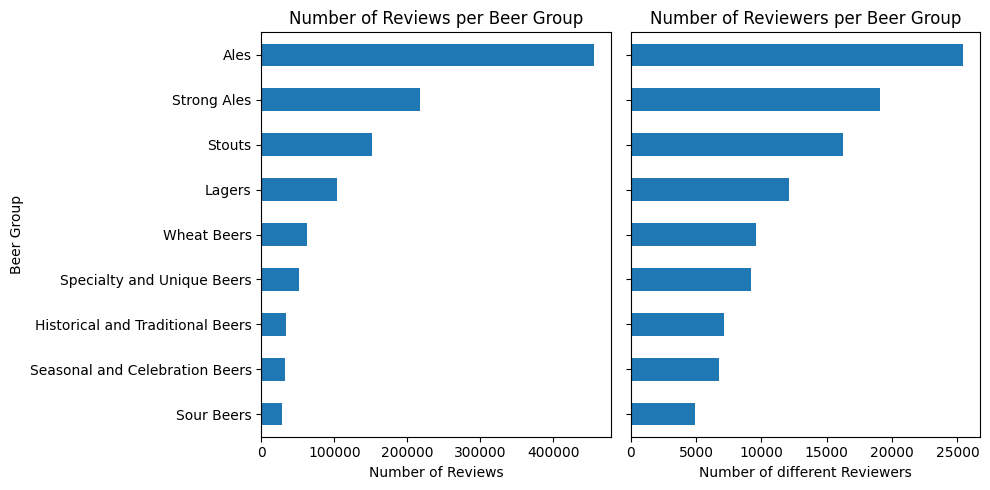

In [82]:
# Create a 1x2 plot with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot the number of reviews per beer group
df['beer_group'].value_counts().sort_values().plot(kind='barh', ax=axs[0])
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Beer Group')
axs[0].set_title('Number of Reviews per Beer Group')

# Plot the number of reviewers per beer group
df.groupby('beer_group')['user_id'].nunique().sort_values().plot(kind='barh', ax=axs[1])
axs[1].set_xlabel('Number of different Reviewers')
axs[1].set_title('Number of Reviewers per Beer Group')

plt.tight_layout()
plt.show()

In [83]:
# Export complete dataset to parquet
# df.to_parquet(dataset_path + 'BA_04_complete.parquet', index=False)

## 3. Verifying the Dataset Representation 🔎 <a id='3-verifying-the-dataset-representation'></a>

> We want to make sure that our dataset is still representative of the initial one. We will compare the metrics computed before and after the filtering.

In [84]:
# Load the complete dataset
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [85]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
508150,161358,24300,Gose,1457434800,wasatch.23172,4.25,4.25,4.25,4.25,4.25,4.25,22 oz. BomberPours a pretty nice sli...,357,61,4.05,4.0,3534,3534,1.118225e+09,"United States, New York",248,3.872951,3.930328,4.086066,4.094262,4.053279,4.034754,0.576670,0.547972,0.453884,0.575840,0.491839,0.486459,bottle,0.226096,1621,18,3.680556,3.888889,4.055556,3.944444,3.916667,3.922778,0.628991,0.619667,0.481691,0.735425,0.630126,0.627074,United States of America,Northern America,Colorado,Sour Beers
1057903,1581,321,Belgian Strong Dark Ale,1308304800,ritzkiss.267056,4.00,4.00,3.00,4.00,4.00,3.90,750ml bottle at Winstons in Saskatoo...,1114,536,3.97,8.0,750,706,1.226833e+09,Belgium,20,4.025749,3.871723,3.925094,4.007022,3.980805,3.962528,0.435757,0.452402,0.500476,0.473820,0.485224,0.381768,bottle,-0.017262,530,239,4.000000,3.900628,3.921548,4.031381,3.972803,3.975649,0.458349,0.468335,0.495639,0.475844,0.473336,0.382194,Canada,Northern America,None,Strong Ales
1039763,46273,17208,Russian Imperial Stout,1299236400,mrmanning.40512,3.50,4.00,3.50,4.00,3.50,3.82,Bottle from LCBO store 575. A very d...,559,189,4.09,9.4,594,594,1.127210e+09,Iceland,36,4.040323,4.065860,4.045699,4.118280,4.099462,4.091022,0.436959,0.364882,0.497217,0.448106,0.457874,0.356144,bottle,0.361667,418,80,4.059375,4.078125,4.018750,4.115625,4.100000,4.091500,0.411934,0.338915,0.453145,0.397667,0.382778,0.304515,Canada,Northern America,None,Stouts


Shape of df :  (1137574, 53)


In [87]:
#list of columns to keep
columns_beer = [
    'beer_nbr_reviews',
    'beer_id_filtered_nbr_reviews',
    
    'beer_id_avg_appearance',
    'beer_id_filtered_avg_appearance',
    
    'beer_id_avg_aroma',
    'beer_id_filtered_avg_aroma',
    
    'beer_id_avg_palate',
    'beer_id_filtered_avg_palate',
    
    'beer_id_avg_taste',
    'beer_id_filtered_avg_taste',
    
    'beer_id_avg_overall',
    'beer_id_filtered_avg_overall',
    
    'beer_id_avg_rating',
    'beer_id_filtered_avg_rating',
    
    'beer_id_std_appearance',
    'beer_id_filtered_std_appearance',
    
    'beer_id_std_aroma',
    'beer_id_filtered_std_aroma',
    
    'beer_id_std_palate',
    'beer_id_filtered_std_palate',
    
    'beer_id_std_taste',
    'beer_id_filtered_std_taste',
    
    'beer_id_std_overall',
    'beer_id_filtered_std_overall',
    
    'beer_id_std_rating',
    'beer_id_filtered_std_rating',
]

columns_user = ['user_nbr_reviews', 
                'user_filtered_nbr_reviews']

# Group by beer_id and user_id and perform aggregation
df_beer = df.groupby('beer_id').agg({col: 'first' for col in columns_beer})
df_user = df.groupby('user_id').agg({col: 'first' for col in columns_user})

In [88]:
display(df_beer.sample(3))

,beer_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_avg_appearance,beer_id_filtered_avg_appearance,beer_id_avg_aroma,beer_id_filtered_avg_aroma,beer_id_avg_palate,beer_id_filtered_avg_palate,beer_id_avg_taste,beer_id_filtered_avg_taste,beer_id_avg_overall,beer_id_filtered_avg_overall,beer_id_avg_rating,beer_id_filtered_avg_rating,beer_id_std_appearance,beer_id_filtered_std_appearance,beer_id_std_aroma,beer_id_filtered_std_aroma,beer_id_std_palate,beer_id_filtered_std_palate,beer_id_std_taste,beer_id_filtered_std_taste,beer_id_std_overall,beer_id_filtered_std_overall,beer_id_std_rating,beer_id_filtered_std_rating
beer_id,,,,,,,,,,,,,,,,,,,,,,,,,,
45840,12,8,4.187500,4.21875,3.979167,4.03125,4.104167,4.125,4.062500,4.250,4.020833,4.28125,4.046667,4.19,0.386196,0.45193,0.376261,0.431722,0.327843,0.353553,0.853635,0.654654,0.842469,0.673974,0.564903,0.457727
207703,3,2,3.916667,3.75000,4.333333,4.50000,4.000000,4.000,4.083333,4.125,4.333333,4.50000,4.180000,4.26,0.288675,0.00000,0.577350,0.707107,0.000000,0.000000,0.144338,0.176777,0.577350,0.707107,0.303480,0.381838
79277,1,1,4.000000,4.00000,2.500000,2.50000,3.000000,3.000,3.000000,3.000,3.000000,3.00000,2.940000,2.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
display(df_user.sample(3))

,user_nbr_reviews,user_filtered_nbr_reviews
user_id,,
derrickw.713512,1,1
beergodz.407588,126,36
jlh8643.5080,72,46


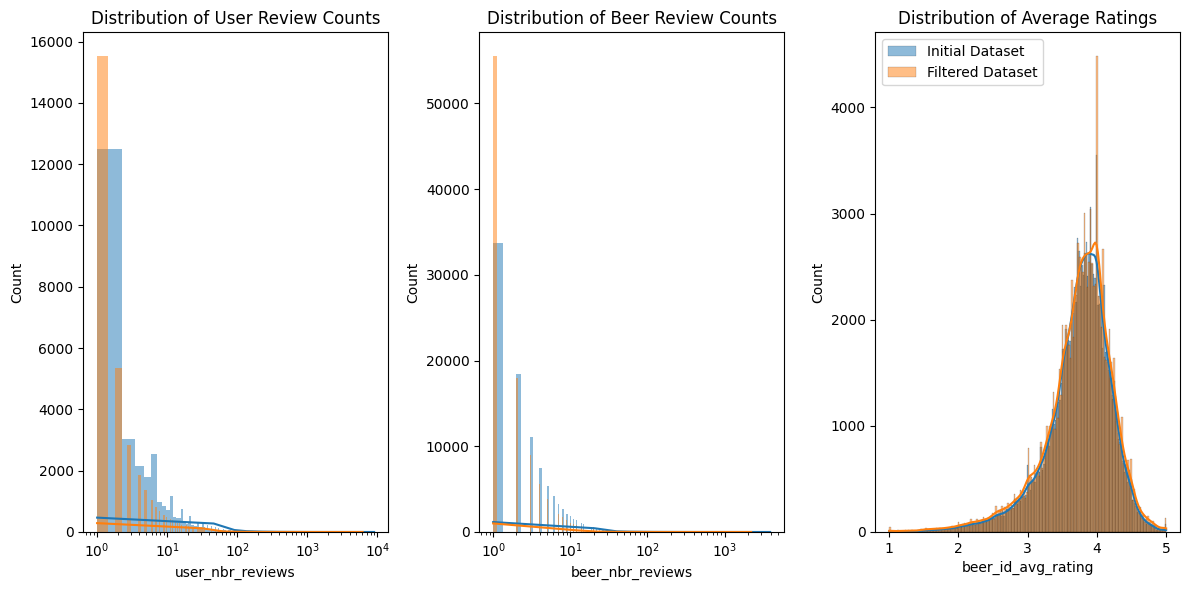

In [91]:
# Check the distribution of key columns to see if they are similar
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Distribution of User Review Counts
axes[0].set_title('Distribution of User Review Counts')
sns.histplot(df_user['user_nbr_reviews'], kde=True, ax=axes[0], label='Initial Dataset')
sns.histplot(df_user['user_filtered_nbr_reviews'], kde=True, ax=axes[0], label='Filtered Dataset')
#axes[0].set_ylim([1e0, 25000])
axes[0].set_xscale('log')
#axes[0].set_yscale('log')

# Distribution of Beer Review Counts
axes[1].set_title('Distribution of Beer Review Counts')
sns.histplot(df_beer['beer_nbr_reviews'], kde=True, ax=axes[1], label='Initial Dataset')
sns.histplot(df_beer['beer_id_filtered_nbr_reviews'], kde=True, ax=axes[1], label='Filtered Dataset')
#axes[1].set_ylim([1e0, 2000000])
axes[1].set_xscale('log')
#axes[1].set_yscale('log')

# Distribution of Average Ratings
axes[2].set_title('Distribution of Average Ratings')
sns.histplot(df_beer['beer_id_avg_rating'], kde=True, ax=axes[2], label='Initial Dataset')
sns.histplot(df_beer['beer_id_filtered_avg_rating'], kde=True, ax=axes[2], label='Filtered Dataset')

plt.tight_layout()
plt.legend()
plt.show()

In [93]:
# compare number of reviews 
t_stat, p_value = ttest_ind(df_user['user_nbr_reviews'], df_user['user_filtered_nbr_reviews'])
print("\nT-Test Results: Number of user reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_nbr_reviews'], df_beer['beer_id_filtered_nbr_reviews'])
print("\nT-Test Results: Number of beer reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Test Results: Number of user reviews 
T-Statistic: 22.686736067642155, P-Value: 1.4070387244650097e-113

T-Test Results: Number of beer reviews 
T-Statistic: 35.087520901667204, P-Value: 5.3695928995850015e-269


In [98]:
# compare similar infos on appearance, aroma, palate, taste, overall and rating
t_stat, p_value = ttest_ind(df_beer['beer_id_avg_appearance'], df_beer['beer_id_filtered_avg_appearance'])
print("\nT-Test Results: Average Appearance")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_aroma'], df_beer['beer_id_filtered_avg_aroma'])
print("\nT-Test Results: Average Aroma")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_palate'], df_beer['beer_id_filtered_avg_palate'])
print("\nT-Test Results: Average Palate")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_taste'], df_beer['beer_id_filtered_avg_taste'])
print("\nT-Test Results: Average Taste")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_overall'], df_beer['beer_id_filtered_avg_overall'])
print("\nT-Test Results: Average Overall")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_rating'], df_beer['beer_id_filtered_avg_rating'])
print("\nT-Test Results: Average Rating")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Test Results: Average Appearance
T-Statistic: 2.225382619954089, P-Value: 0.026056524639576115

T-Test Results: Average Aroma
T-Statistic: 2.6578061840660827, P-Value: 0.00786565220581063

T-Test Results: Average Palate
T-Statistic: 2.097705124875447, P-Value: 0.0359322853658205

T-Test Results: Average Taste
T-Statistic: 2.6436374978087365, P-Value: 0.00820259819873397

T-Test Results: Average Overall
T-Statistic: 3.2194249899029117, P-Value: 0.0012846569737896155

T-Test Results: Average Rating
T-Statistic: 2.887284833255068, P-Value: 0.00388618308220899


> Since all p-values are smaller than 0.05, we can reject the null hypothesis that the means of the two samples are equal. This means that the filtering has an impact on the dataset representation. Although the distributions look similar, the filtered dataset is not representative of the initial one.

> This does not necessarly mean that the conclusions we draw from the filtered dataset are wrong. We can still evaluate the impact of the serving style on the tasting profile.

## 4. Visualizations 📊 <a id='4-visualizations'></a>

> Some visualizations were made to better understand the data and to find patterns.

In [52]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

### 4.1 Temporal Analysis 📅 <a id='4_1-temporal-analysis'></a>

In [53]:
# add column with review date
df['review_date'] = pd.to_datetime(df['date'], unit='s')

# extract year and month from review date
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# drop column review date
df.drop(columns=['review_date'], inplace=True)

# keep only reviews from 2002 to 2016
df = df[df['review_year'] <= 2016]
df = df[df['review_year'] >= 2002]

In [54]:
# for each year, count the number of reviews for each month and store it in a new df
df_monthly = df.groupby(['review_year', 'review_month']).agg({'text': 'count'})

# change the df to a 180x3 df with columns year, month and number of reviews
df_monthly = df_monthly.reset_index().rename(columns={'text': 'nbr_reviews'})

# add a column with the number of reviews per year
df_monthly['nbr_reviews_year'] = df_monthly.groupby('review_year')['nbr_reviews'].transform('sum')

# add a column with nbr_reviews / nbr_reviews_year
df_monthly['percentage'] = df_monthly['nbr_reviews'] / df_monthly['nbr_reviews_year']

df_monthly.sample(5)

,review_year,review_month,nbr_reviews,nbr_reviews_year,percentage
65,2007,6,3932,54409,0.072267
45,2005,10,2849,30469,0.093505
55,2006,8,4332,46795,0.092574
71,2007,12,5571,54409,0.102391
106,2010,11,11623,127034,0.091495


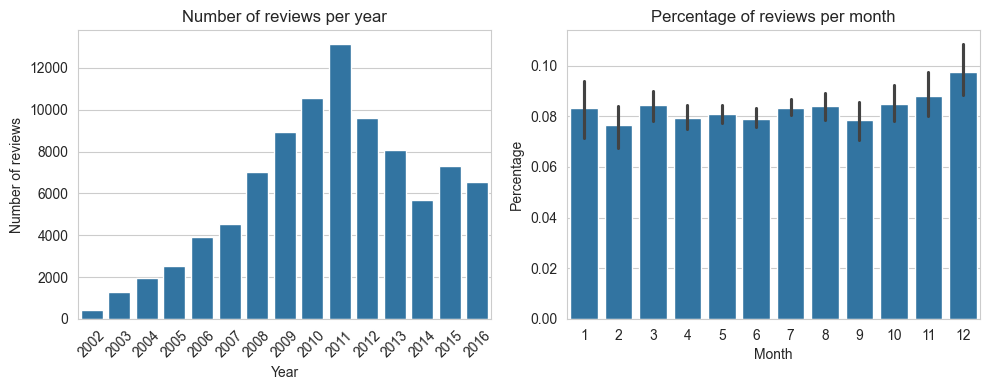

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of reviews per year
sns.barplot(x='review_year', y='nbr_reviews', data=df_monthly, ax=axes[0], errorbar=None)
axes[0].set_title('Number of reviews per year')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Number of reviews')

# show the percentage of reviews per month
sns.barplot(x='review_month', y='percentage', data=df_monthly, ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Percentage of reviews per month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

> The website has grown in popularity over the years, with more and more reviews being posted each year. The peak popularity was in 2011 with almost 160'000 reviews. Since then, the number of reviews has been decreasing. 

> As for the months, there is not a lot a variation. The number of reviews is quite constant over the months. It seems like December is a slightly more popular month.

In [56]:
# add column with user_joined date
df['user_joined__date'] = pd.to_datetime(df['user_joined'], unit='s')

# extract year and month from user_joined date
df['user_joined_year'] = df['user_joined__date'].dt.year
df['user_joined_month'] = df['user_joined__date'].dt.month

# drop column user_joined date
df.drop(columns=['user_joined__date'], inplace=True)

# keep only reviews from 2002 to 2016
df = df[df['user_joined_year'] <= 2016]
df = df[df['user_joined_year'] >= 2002]

df[['date', 'user_joined_year', 'user_joined_month']].sample(3)

,date,user_joined_year,user_joined_month
386443,1319364000,2010,8
71414,1451818800,2003,6
937285,1294311600,2008,5


In [59]:
# for each year, count the number of new users for each month and store it in a new df
df_new_users = df.groupby(['user_joined_year', 'user_joined_month']).agg({'text': 'count'})

# change the df to a 180x3 df with columns year, month and number of new users
df_new_users = df_new_users.reset_index().rename(columns={'text': 'nbr_new_users'})

# add a column with the number of new users per year
df_new_users['nbr_new_users_year'] = df_new_users.groupby('user_joined_year')['nbr_new_users'].transform('sum')

# add a column with nbr_new_users / nbr_new_users_year
df_new_users['percentage'] = df_new_users['nbr_new_users'] / df_new_users['nbr_new_users_year']

df_new_users.sample(3)

,user_joined_year,user_joined_month,nbr_new_users,nbr_new_users_year,percentage
5,2002,6,2091,37175,0.056247
107,2010,12,9664,123674,0.078141
108,2011,1,10959,69318,0.158097


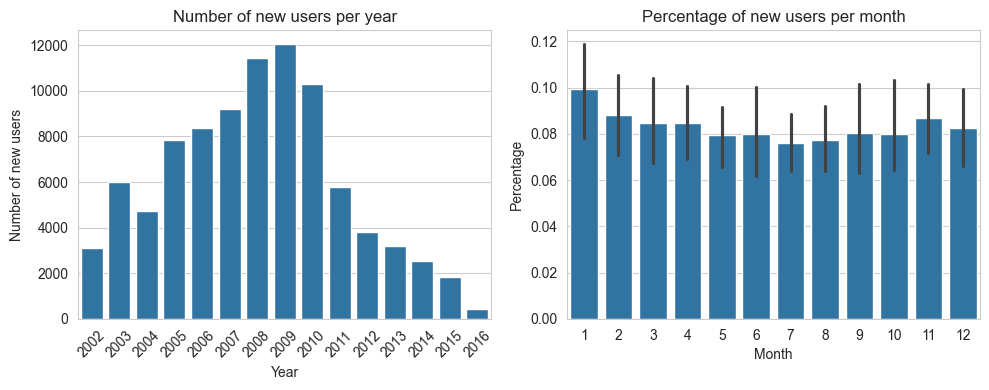

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of new users per year
sns.barplot(x='user_joined_year', y='nbr_new_users', data=df_new_users, ax=axes[0], errorbar=None)
axes[0].set_title('Number of new users per year')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Number of new users')

# show the percentage of new users per month
sns.barplot(x='user_joined_month', y='percentage', data=df_new_users, ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Percentage of new users per month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

> As we can see, the popularity of the website had indeed gone down since 2011 where the number of reviews was already decreasing. The number of new users is quite constant over the months. 

### 4.2 Geographical Analysis 🌎 <a id='4_2-geographical-analysis'></a>

In [63]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

### 4.3 Beer Style Analysis 🍻 <a id='4_3-beer-style-analysis'></a>

In [64]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

## 5. Statistical Analysis 📈 <a id='5-statistical-analysis'></a>

In [3]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')  

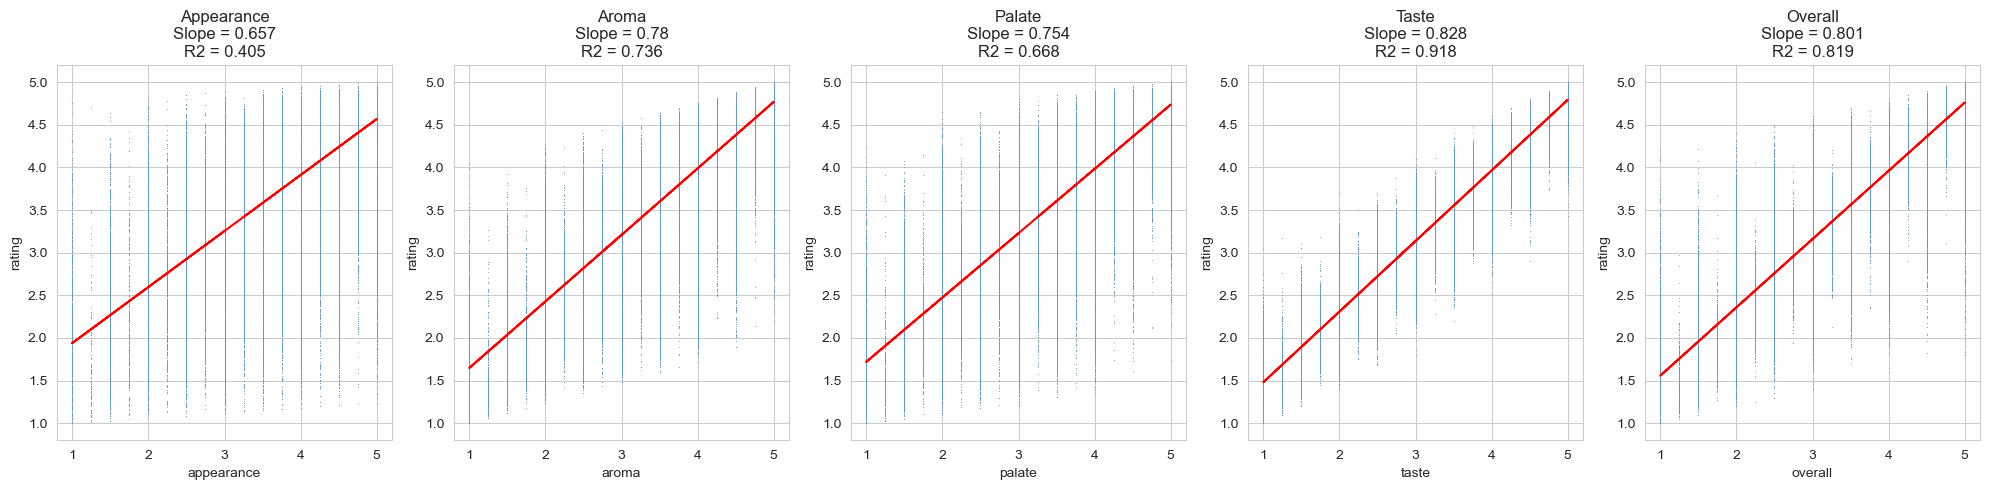

In [4]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

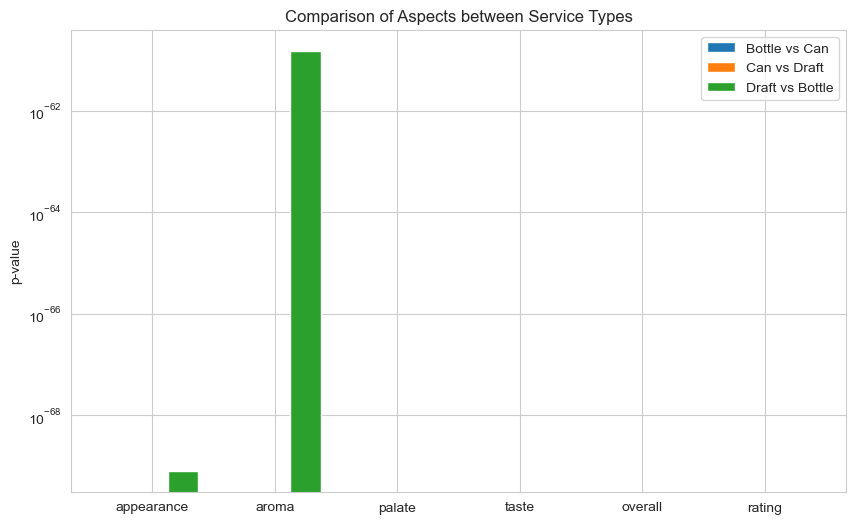

In [5]:
# compare each aspect between all three serving types

# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type_rulebased'] == 'bottle'][columns[i]], df[df['serving_type_rulebased'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type_rulebased'] == 'can'][columns[i]], df[df['serving_type_rulebased'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type_rulebased'] == 'draft'][columns[i]], df[df['serving_type_rulebased'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_2664\499421975.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(151)


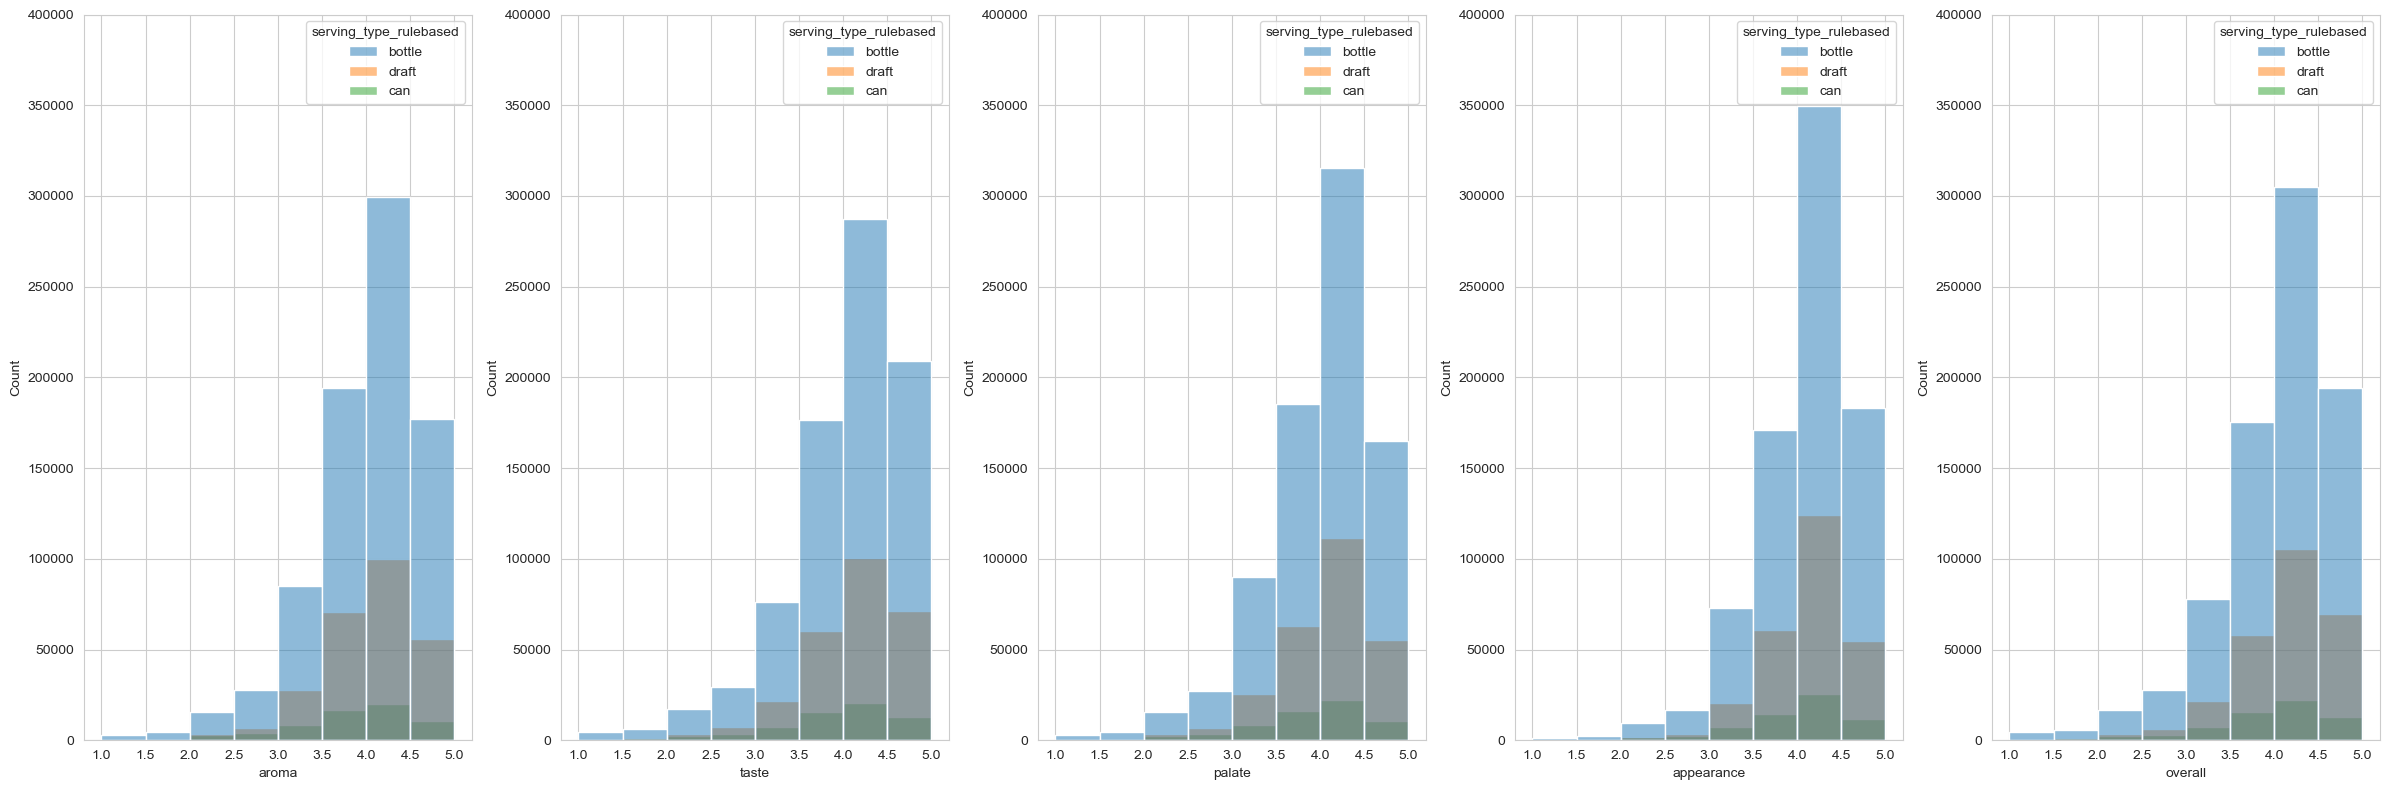

In [6]:
# Histogram of the ratings for each serving type
plt.subplots(figsize=(24, 8))
plt.subplot(151)
sns.histplot(data=df, hue='serving_type_rulebased', x='aroma', binwidth=0.5)
plt.ylim(0, 400000)
plt.subplot(152)
sns.histplot(data=df, hue='serving_type_rulebased', x='taste', binwidth=0.5)
plt.ylim(0, 400000)
plt.subplot(153)
sns.histplot(data=df, hue='serving_type_rulebased', x='palate', binwidth=0.5)
plt.ylim(0, 400000)
plt.subplot(154)
sns.histplot(data=df, hue='serving_type_rulebased', x='appearance', binwidth=0.5)
plt.ylim(0, 400000)
plt.subplot(155)
sns.histplot(data=df, hue='serving_type_rulebased', x='overall', binwidth=0.5)
plt.ylim(0, 400000)
plt.tight_layout()
plt.show()